# RTX 2070 Benchmarks - August 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Default Tensor Shape

N = 1

C = 3 

H = 512 

W = 512 

Padding = SAME

Filter Count = 1

Filter Height = 3

Filter Width = 3

Rank=1,2,4,8,16

In [2]:
substring = "2070-190818"

In [30]:
def plot2dRank(cp_df, nv_df, Var, x_label):
    fig = plt.figure(figsize=(16, 9), dpi=128)
    ax = fig.add_subplot(1,1,1)
    ax.set_title('2D Convolution - ' + x_label, fontsize=16)
    ax.set_ylabel(r'Execution Time ($\mu$s)')
    ax.set_xlabel(x_label)
    ax.set_facecolor('0.9')

    cp_df.set_index([Var, "fRank"])["us"].unstack().plot(style=':', ax=ax, cmap=plt.cm.autumn)
    nv_df.groupby([Var]).mean()['us'].plot(ax=ax, color="green")
#     plt.yscale('log')
    plt.show()

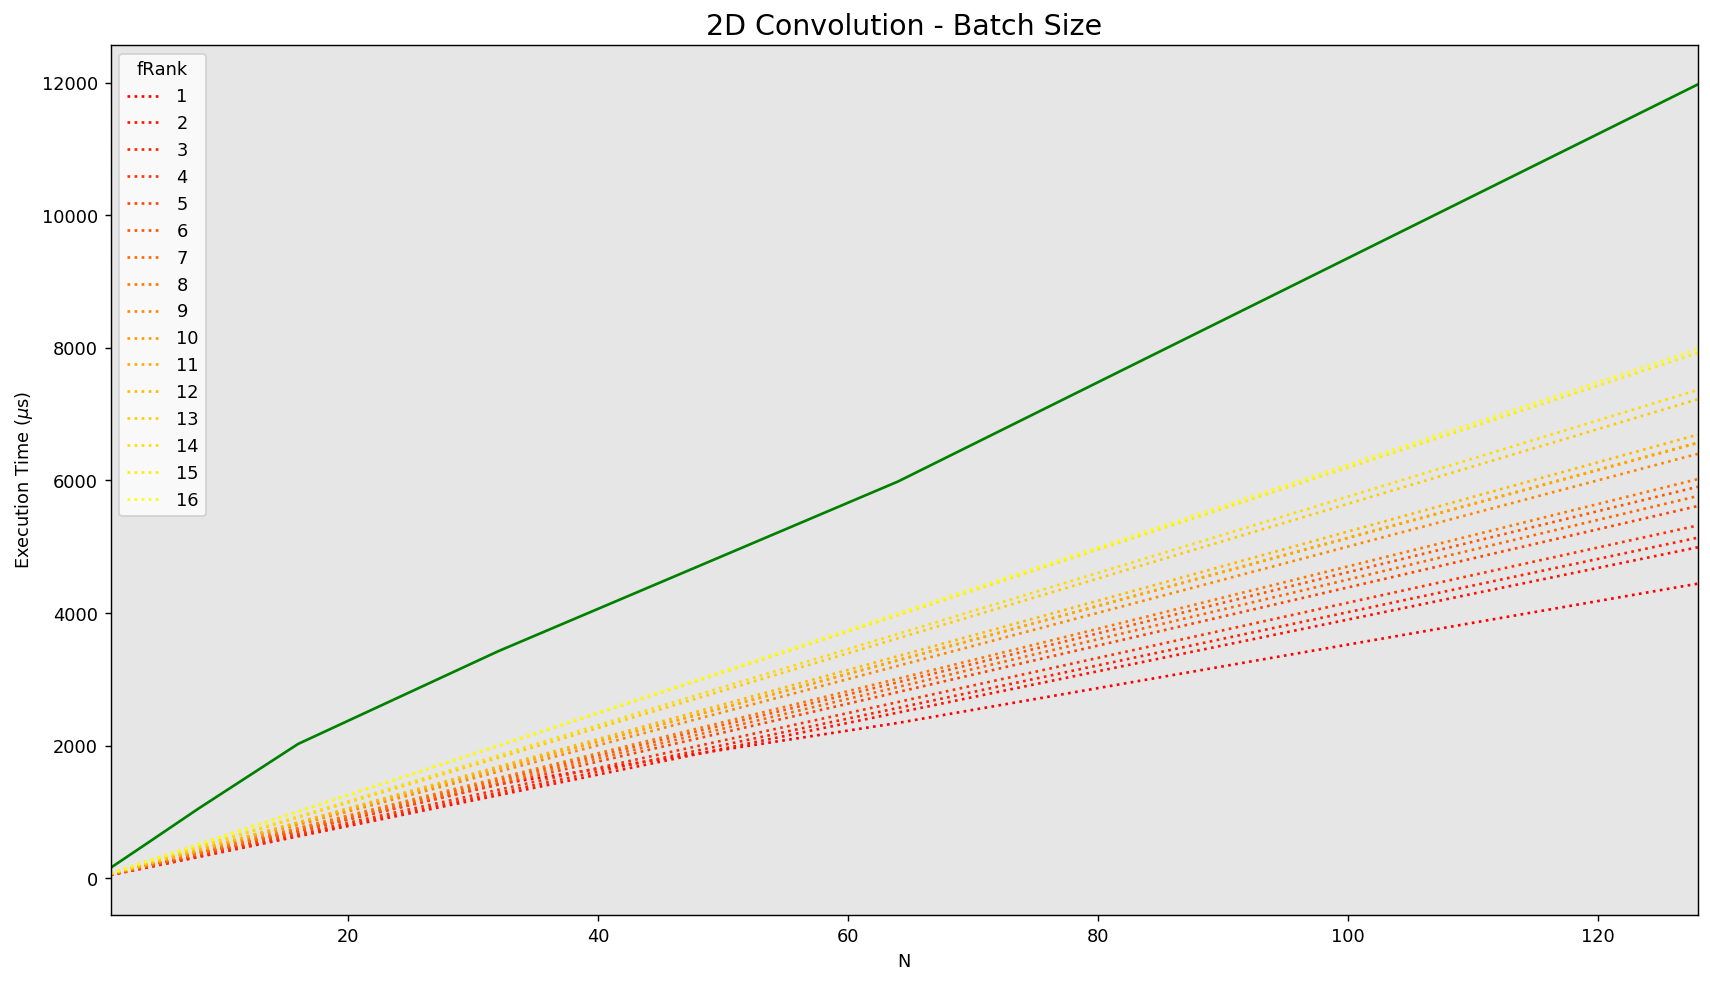

In [31]:
cp_df = pd.read_csv("CP4Conv2dForward_results_"+substring+"_BatchSize.txt")
nv_df = pd.read_csv("NVConv2dForward_results_"+substring+"_batch_size.txt")
plot2dRank(cp_df, nv_df, 'N', 'Batch Size')

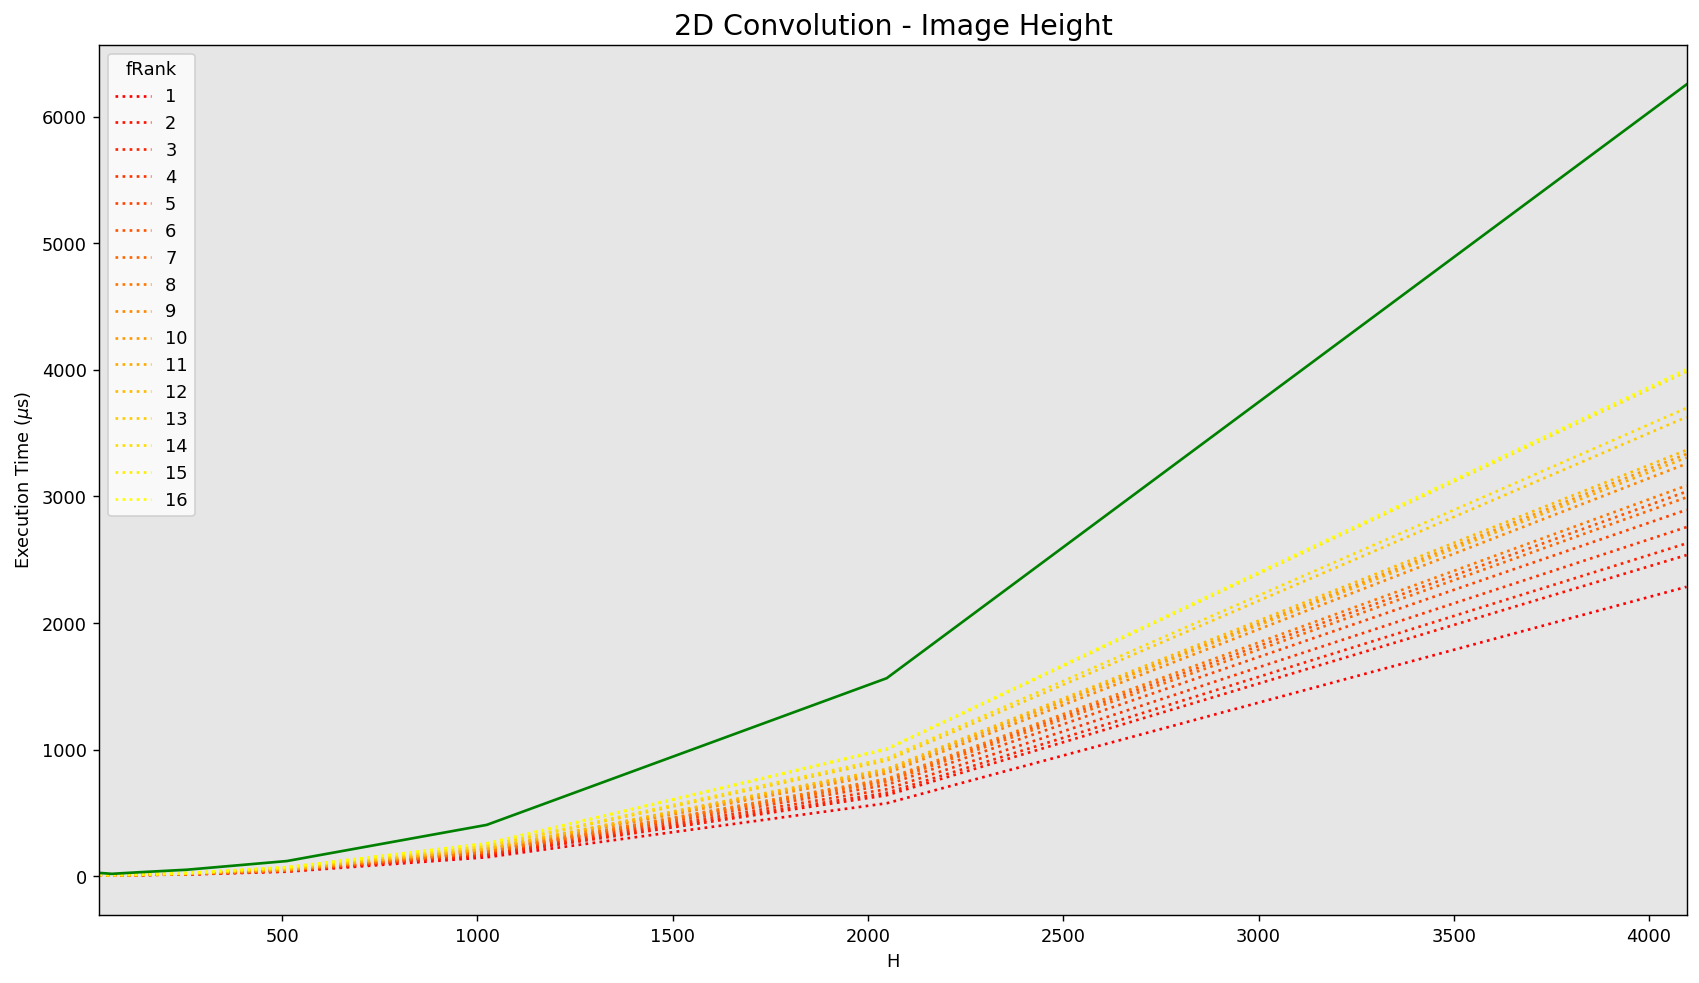

In [32]:
cp_df = pd.read_csv("CP4Conv2dForward_results_"+substring+"_ImageSize.txt")
nv_df = pd.read_csv("NVConv2dForward_results_"+substring+"_image_size.txt")
plot2dRank(cp_df, nv_df, 'H', 'Image Height')

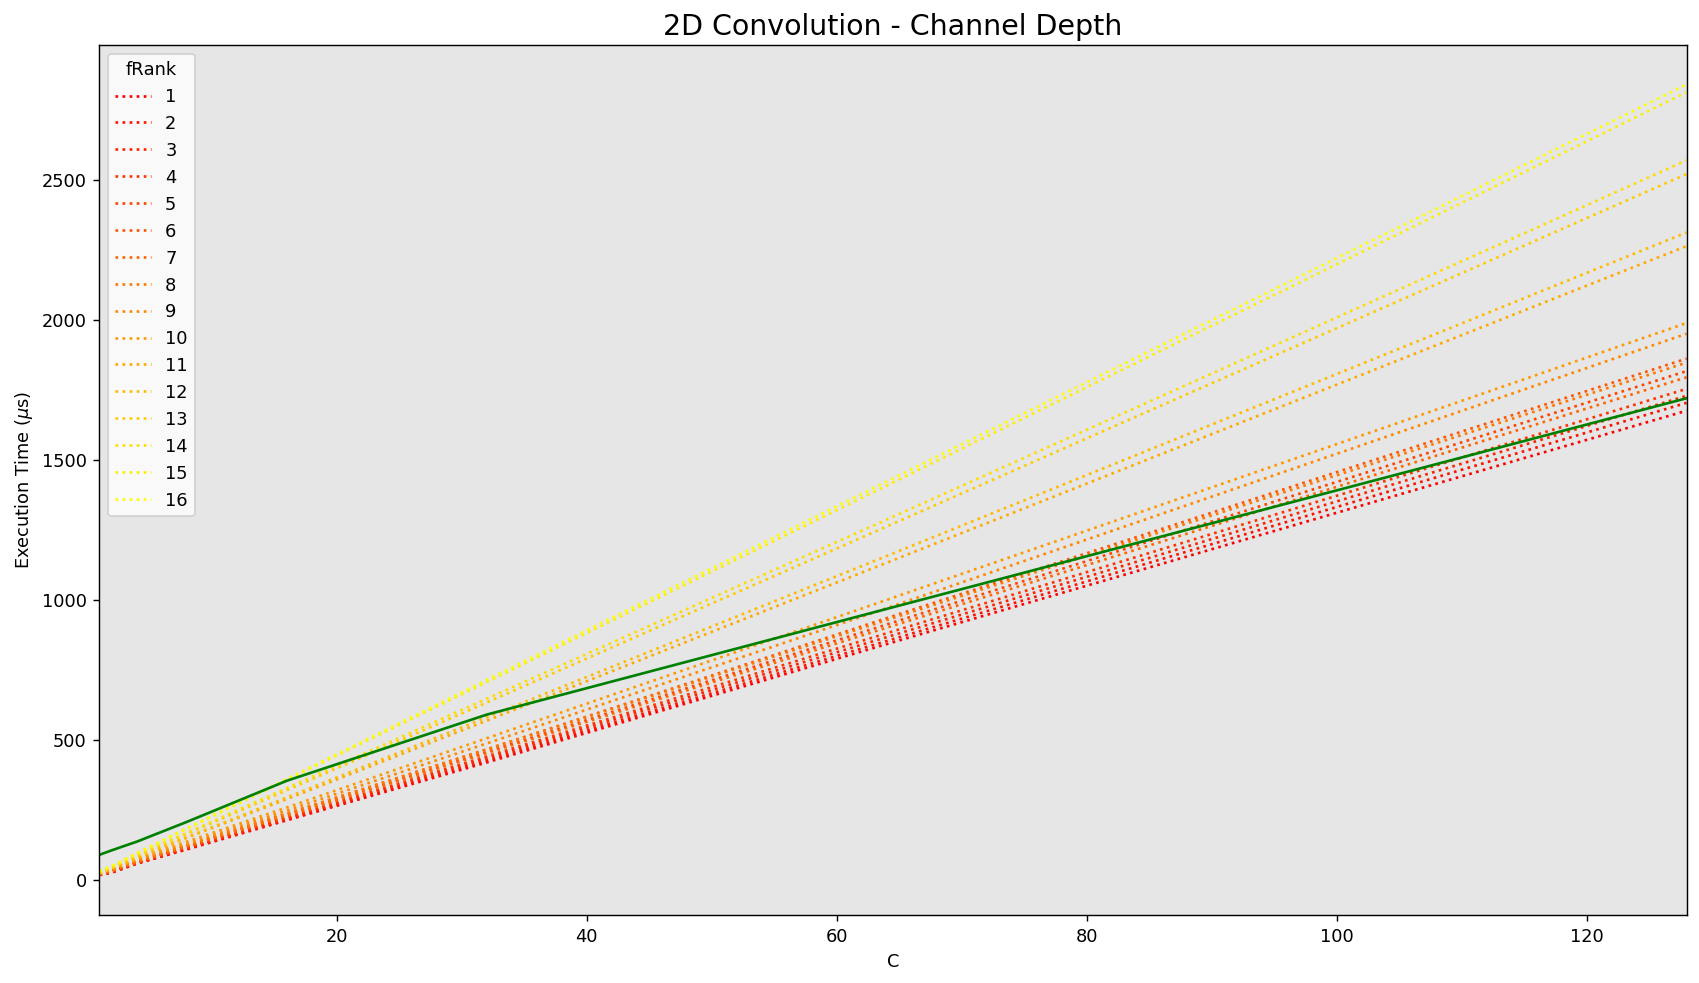

In [33]:
cp_df = pd.read_csv("CP4Conv2dForward_results_"+substring+"_ChannelDepth.txt")
nv_df = pd.read_csv("NVConv2dForward_results_"+substring+"_channel_depth.txt")
plot2dRank(cp_df, nv_df, 'C', 'Channel Depth')

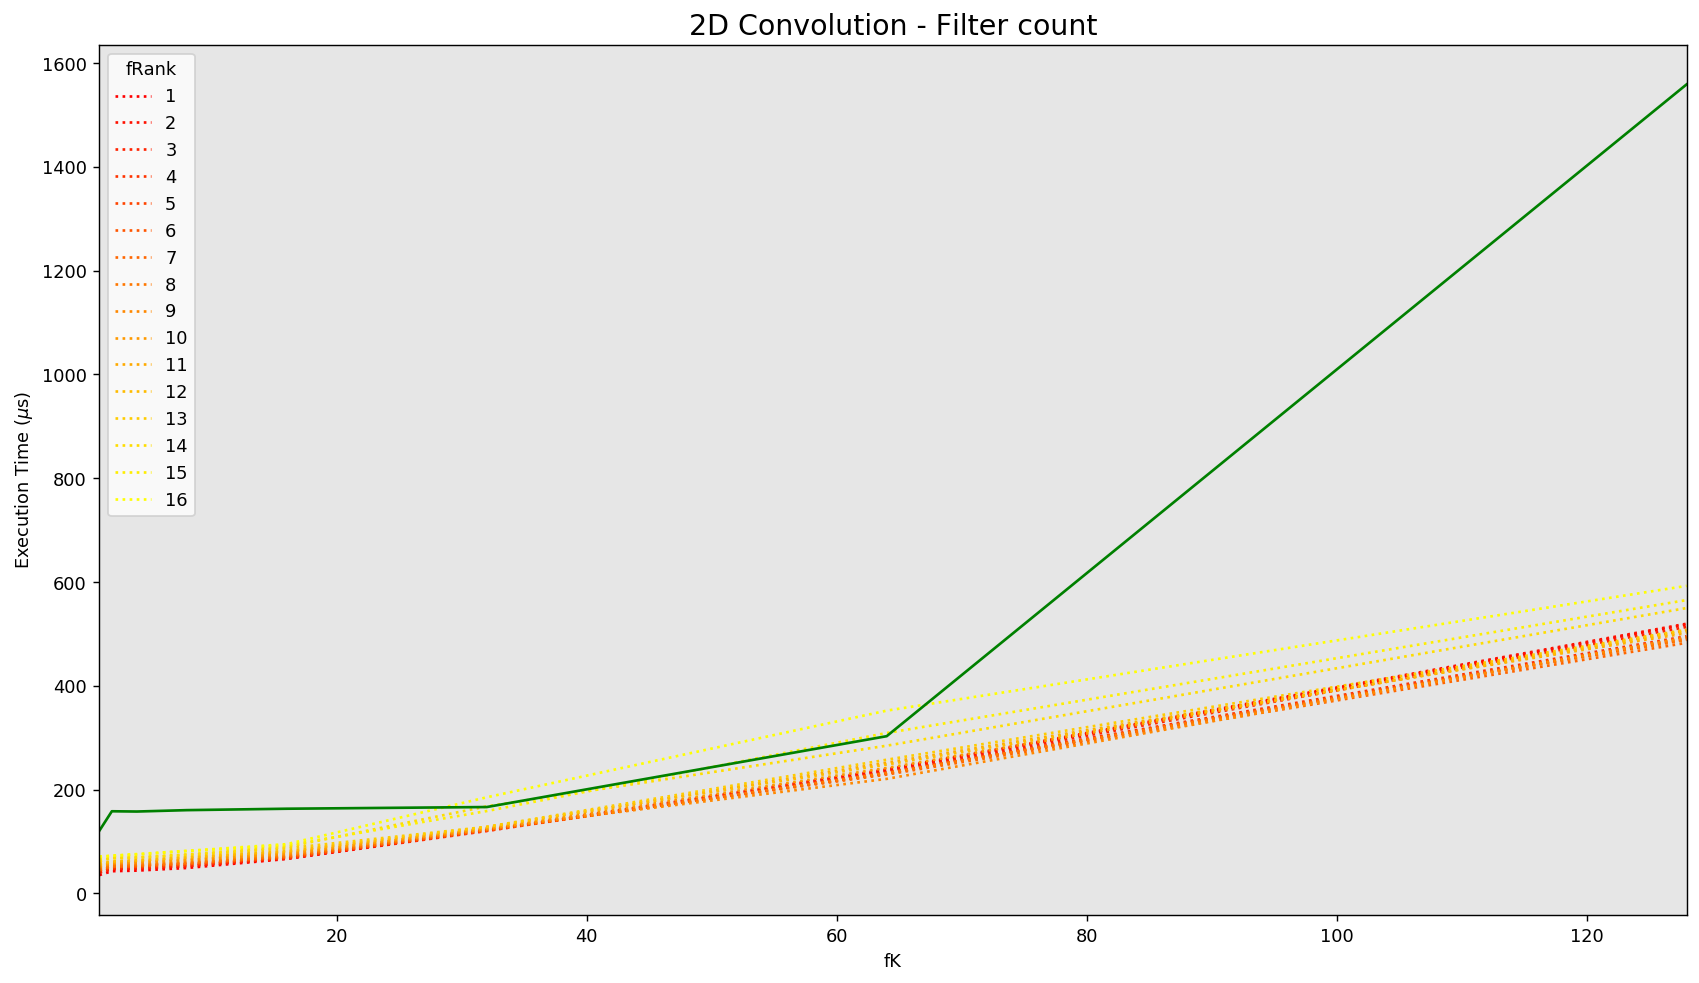

In [34]:
cp_df = pd.read_csv("CP4Conv2dForward_results_"+substring+"_FilterCount.txt")
nv_df = pd.read_csv("NVConv2dForward_results_"+substring+"_filter_count.txt")
plot2dRank(cp_df, nv_df, 'fK', 'Filter count')

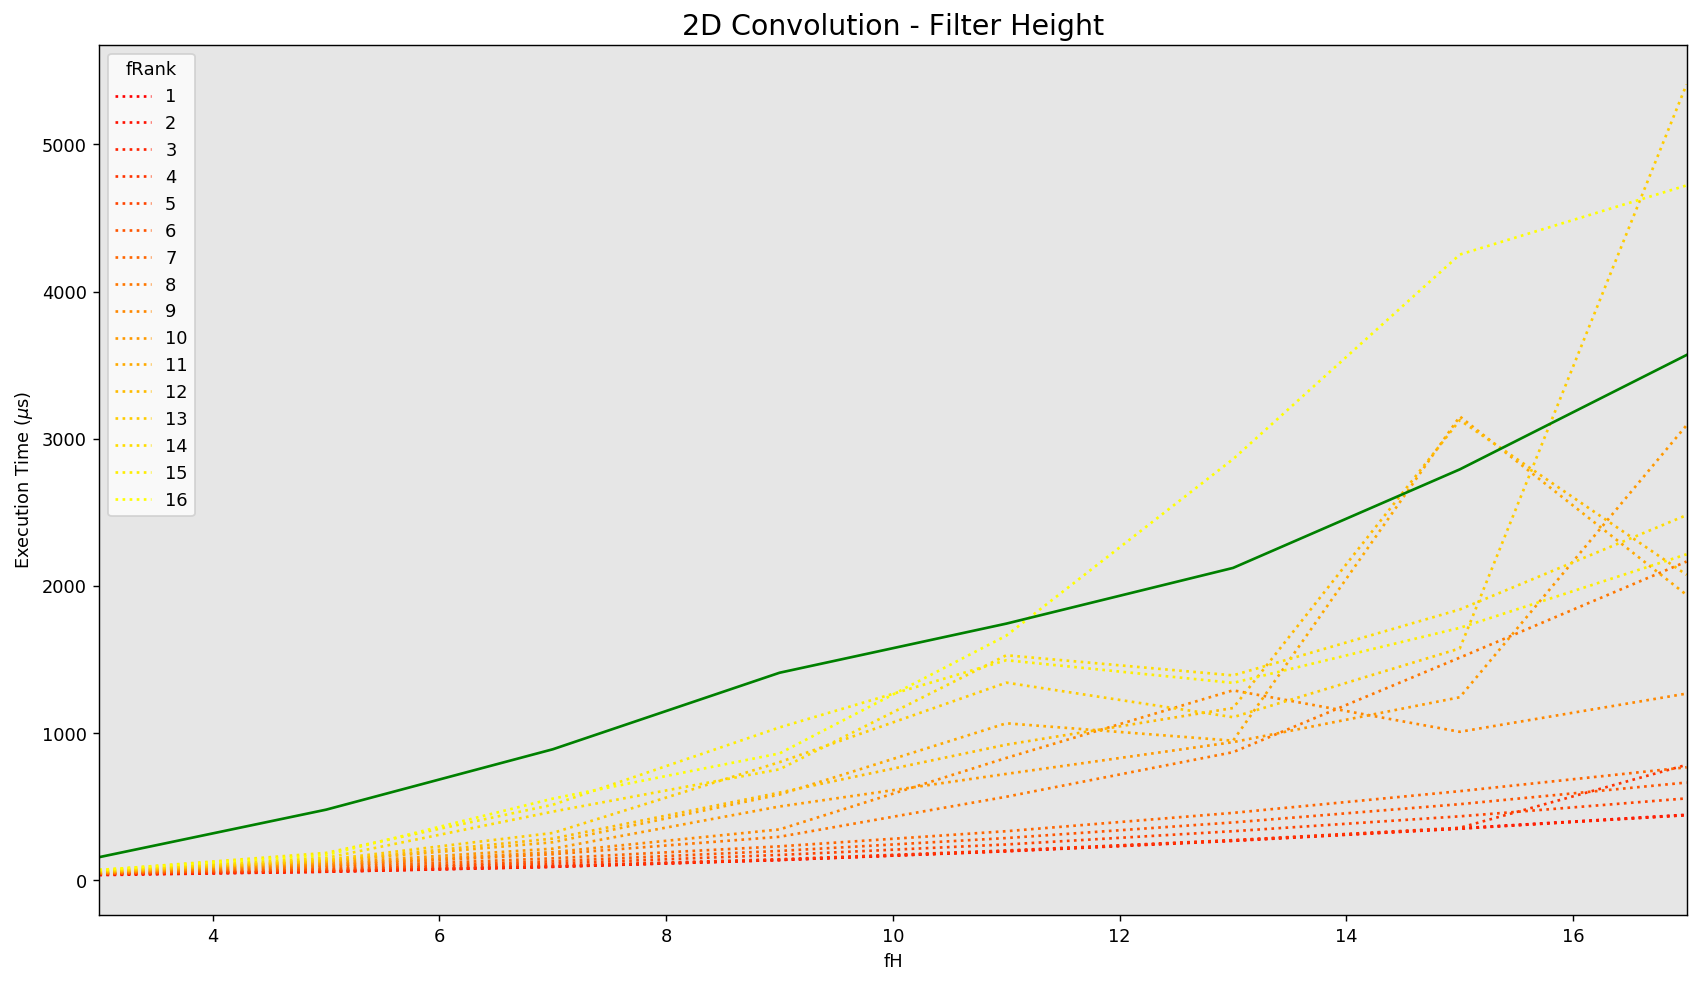

In [35]:
cp_df = pd.read_csv("CP4Conv2dForward_results_"+substring+"_FilterSize.txt")
nv_df = pd.read_csv("NVConv2dForward_results_"+substring+"_filter_size.txt")
plot2dRank(cp_df, nv_df, 'fH', 'Filter Height')